### Student Information
Name: 張仲彣

Student ID:109065528

GitHub ID: cssource1156

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

# **2.Second Part**

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
file = "./sentiment labelled sentences/imdb_labelled.txt"
imbd = open(file, 'r')
imbd = imbd.readlines()  

In [2]:
imbd_list = []
for i in imbd:
    i= i.replace("\n", "")
    imbd_list.append(i.split('\t'))

In [3]:
imbd_list

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0'],
 ['Very little music or anything to speak of.  ', '0'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  '1'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  '0'],
 ['Wasted two hours.  ', '0'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  '1'],
 ['A bit predictable.  ', '0'],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', '1'],
 ['And those baby owls were adorable.  ', '1'],
 ["

In [4]:
imbd_list[0:10][0:10]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0'],
 ['Very little music or anything to speak of.  ', '0'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  '1'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  '0'],
 ['Wasted two hours.  ', '0'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  '1'],
 ['A bit predictable.  ', '0'],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', '1']]

In [5]:
len(imbd_list)

1000

In [131]:
imbd_list[10][0]
sen_list = []
score_list =[]
for i in range(len(imbd_list)):
    st = str(imbd_list[i][0])
    sen_list.append(st)
    score = imbd_list[i][1]
    score_list.append(score)
#prepare to put these list into a DataFrame

In [7]:
imbd = pd.DataFrame({'sentence':sen_list,
                        'score':score_list})
imbd

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [8]:
imbd.score

0      0
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: score, Length: 1000, dtype: object

In [11]:
for t in imbd["sentence"][:3]:
    print(t)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  


In [12]:
imbd[-10:]

,sentence,score
990,"The opening sequence of this gem is a classic,...",1
991,Fans of the genre will be in heaven.,1
992,Lange had become a great actress.,1
993,It looked like a wonderful story.,1
994,I never walked out of a movie faster.,0
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0
999,All in all its an insult to one's intelligence...,0


In [13]:
imbd.iloc[::10, 0:2][0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
10,And those baby owls were adorable.,1
20,I can think of no other film where something v...,1
30,"There are massive levels, massive unlockable c...",1
40,The very idea of it was lame - take a minor ch...,0
50,I'm glad the film didn't go for the most obvio...,1
60,I sat riveted to the TV screen.,1
70,"And, quite honestly, often its not very good.",0
80,I'm glad this pretentious piece of s*** didn't...,0
90,Definitely worth checking out.,1


In [14]:
imbd.loc[::10, 'sentence'][0:10]

0     A very, very, very slow-moving, aimless movie ...
10                 And those baby owls were adorable.  
20    I can think of no other film where something v...
30    There are massive levels, massive unlockable c...
40    The very idea of it was lame - take a minor ch...
50    I'm glad the film didn't go for the most obvio...
60                    I sat riveted to the TV screen.  
70      And, quite honestly, often its not very good.  
80    I'm glad this pretentious piece of s*** didn't...
90                     Definitely worth checking out.  
Name: sentence, dtype: object

In [15]:
imbd[::10][0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
10,And those baby owls were adorable.,1
20,I can think of no other film where something v...,1
30,"There are massive levels, massive unlockable c...",1
40,The very idea of it was lame - take a minor ch...,0
50,I'm glad the film didn't go for the most obvio...,1
60,I sat riveted to the TV screen.,1
70,"And, quite honestly, often its not very good.",0
80,I'm glad this pretentious piece of s*** didn't...,0
90,Definitely worth checking out.,1


In [17]:
imbd.loc[lambda f: f.score == '1'].iloc[::10, :][0:5]

,sentence,score
4,The best scene in the movie was when Gerardo i...,1
18,It's practically perfect in all of them  a tr...,1
30,"There are massive levels, massive unlockable c...",1
51,In addition to having one of the most lovely s...,1
73,There are some generally great things in it.,1


In [18]:
imbd.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [19]:
import helpers.data_mining_helpers as dmh
imbd.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [20]:
imbd.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

In [22]:
imbd_sample = imbd.sample(n=50)

In [24]:
len(imbd_sample)
imbd_sample[0:4]

,sentence,score
910,I highly doubt that anyone could ever like thi...,0
517,"The script is bad, very bad  it contains both...",0
384,They could be used as exemplars for any set de...,1
368,I felt as though her going to Ireland did abso...,0


In [27]:
sentence = sen_list
score = score_list
#突然覺得後面可能會用到先assign一下

1    500
0    500
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

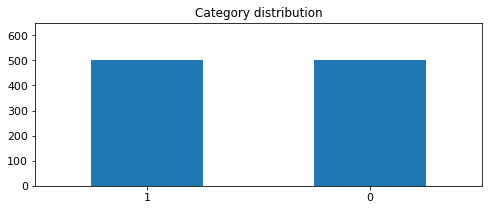

In [29]:
print(imbd.score.value_counts())

ylim_max = imbd_sample['score'].describe().freq
# plot barchart for X_sample
imbd.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

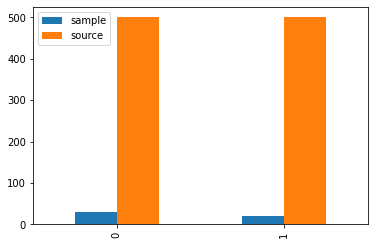

In [32]:
import matplotlib.pyplot as plt
df = pd.concat([imbd_sample.score.value_counts(), imbd.score.value_counts()], axis=1, sort=True)
df.columns = ["sample", "source"]
df.plot(kind="bar")

plt.show()

In [33]:
import nltk

In [35]:
imbd['unigrams'] = imbd['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [37]:
imbd[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
imbd_counts = count_vect.fit_transform(imbd.sentence)

print(imbd_counts)

  (0, 2871)	3
  (0, 2404)	1
  (0, 1750)	1
  (0, 92)	1
  (0, 1748)	1
  (0, 37)	1
  (0, 748)	1
  (0, 786)	1
  (0, 3037)	1
  (0, 1639)	1
  (1, 1813)	1
  (1, 2567)	1
  (1, 2965)	1
  (1, 2917)	1
  (1, 1733)	1
  (1, 1605)	1
  (1, 2638)	2
  (1, 1035)	1
  (1, 431)	1
  (1, 1862)	1
  (1, 196)	1
  (1, 1777)	1
  (1, 1206)	1
  (1, 1837)	1
  (1, 2969)	1
  :	:
  (996, 3003)	1
  (996, 2288)	1
  (996, 2812)	1
  (996, 2886)	1
  (996, 2143)	1
  (997, 1358)	1
  (997, 1423)	1
  (997, 1428)	1
  (997, 3001)	1
  (997, 837)	1
  (998, 222)	1
  (998, 911)	1
  (999, 1837)	1
  (999, 125)	1
  (999, 2694)	1
  (999, 1358)	1
  (999, 100)	2
  (999, 1854)	1
  (999, 123)	1
  (999, 2921)	1
  (999, 1725)	1
  (999, 1430)	1
  (999, 1316)	1
  (999, 1397)	1
  (999, 1393)	1


In [39]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [40]:
imbd_counts.shape

(1000, 3047)

In [41]:
count_vect.get_feature_names()[0:10]

['10', '12', '13', '15', '15pm', '17', '18th', '1928', '1947', '1948']

In [43]:
imbd_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [44]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [45]:
plot_x

['term_10',
 'term_12',
 'term_13',
 'term_15',
 'term_15pm',
 'term_17',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2005',
 'term_2006']

In [46]:
plot_y = ["doc_"+ str(i) for i in list(imbd.index)[0:20]]

In [47]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [68]:
plot_z = imbd_counts[980:1000, 980:1000].toarray()

In [64]:
imbd_counts

<1000x3047 sparse matrix of type '<class 'numpy.int64'>'
	with 12666 stored elements in Compressed Sparse Row format>

In [52]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **3.THIRD PARR**

# Visualization

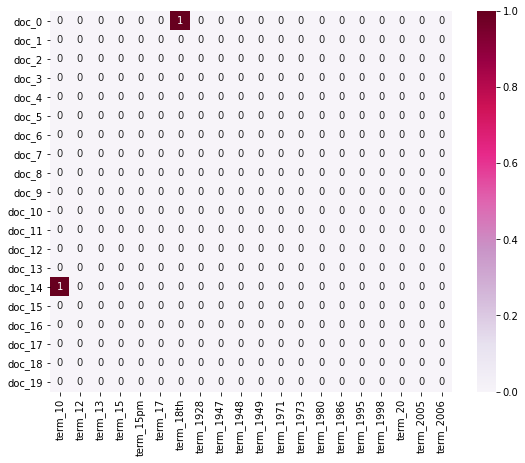

In [69]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
## data issues cost this result

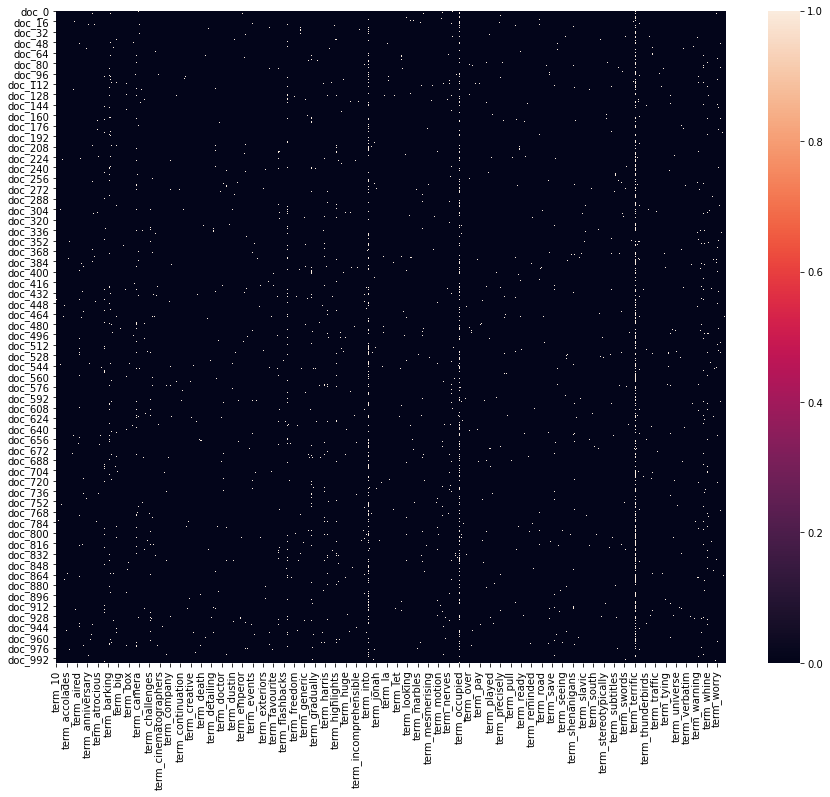

In [71]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(imbd.index)]
plot_z = imbd_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw,vmin=0,vmax=1)

In [72]:
from sklearn.decomposition import PCA

In [73]:
imbd_reduced = PCA(n_components = 3).fit_transform(imbd_counts.toarray())

In [74]:
imbd_reduced.shape

(1000, 3)

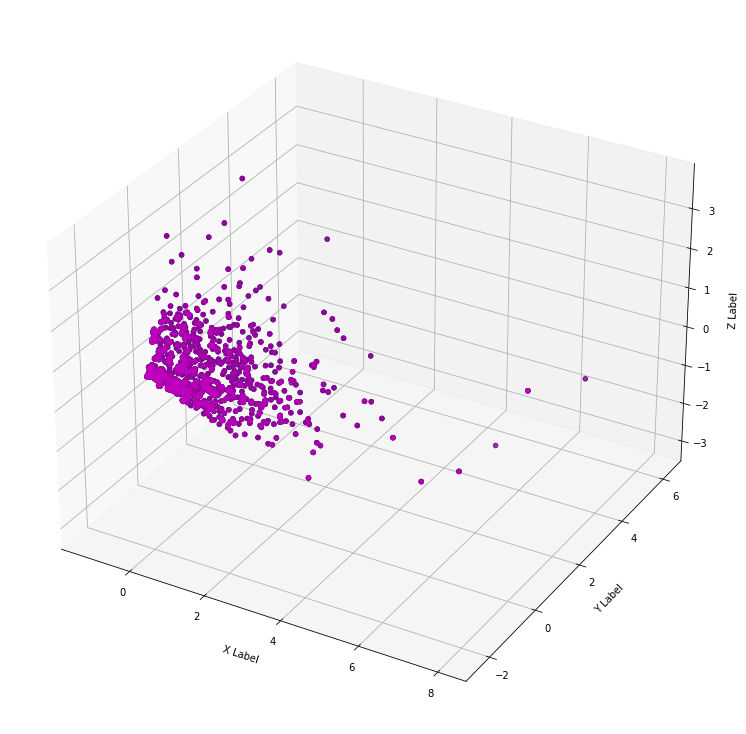

In [75]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, score):
    xs = imbd_reduced[imbd['score'] == score].T[0]
    ys = imbd_reduced[imbd['score'] == score].T[1]
    zs = imbd_reduced[imbd['score'] == score].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [77]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,imbd_counts.shape[1]):
    term_frequencies.append(sum(imbd_counts[:,j].toarray()))

In [78]:
term_frequencies = np.asarray(imbd_counts.sum(axis=0))[0]

In [79]:
term_frequencies[0]

29

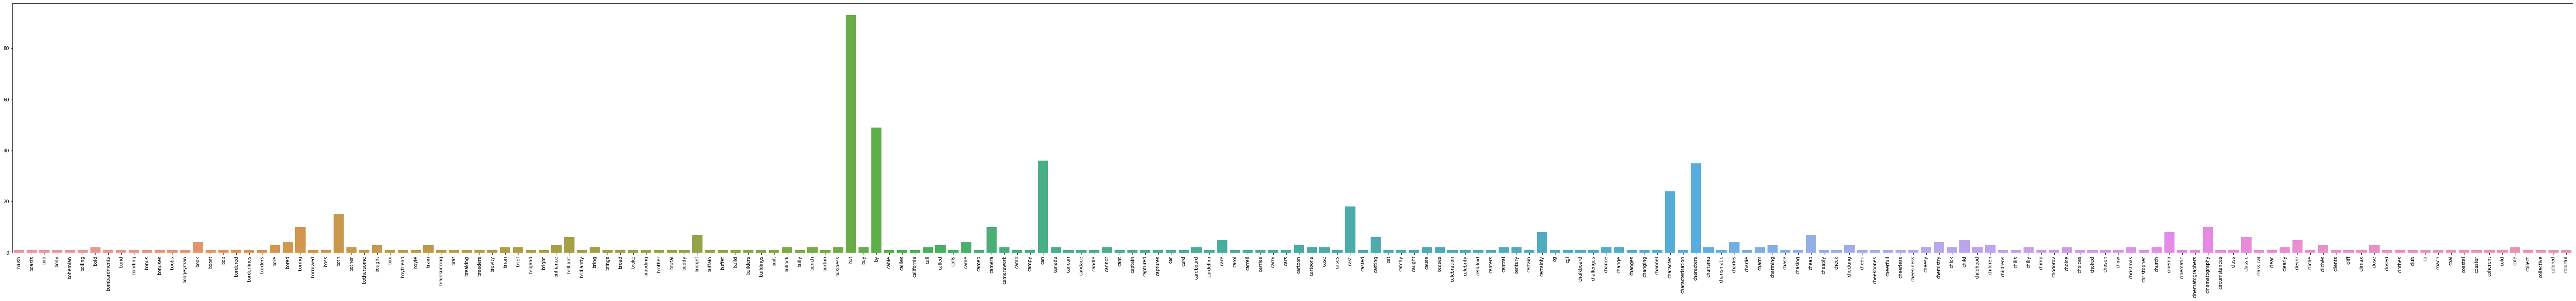

In [107]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[300:500], 
            y=term_frequencies[300:500])
g.set_xticklabels(count_vect.get_feature_names()[300:500], rotation = 90);

# TF-IDF Vectorizer 

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
imbd_corpus = open(file, 'r')
imbd_corpus = imbd_corpus.read()
imbd_corpus= imbd_corpus.replace("\n", " ")
imbd_corpus= imbd_corpus.replace("\t", "")
imbd_corpus= imbd_corpus.replace("0", "")
imbd_corpus= imbd_corpus.replace("1", "")
imbd_corpus = imbd_corpus.split("  ")

In [93]:
imbd_corpus

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
 ' Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
 ' Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
 ' Very little music or anything to speak of.',
 ' The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.',
 " The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",
 ' Wasted two hours.',
 ' Saw the movie today and thought it was a good effort, good messages for kids.',
 ' A bit predictable.',
 ' Loved the casting of Jimmy Buffet as the science teacher.',
 ' And those baby owls were adorable.',
 " The movie showed a lot of Florida at it's best, made it look very appealing.",
 ' The Songs Were The 

In [94]:
vectorizer = TfidfVectorizer()

In [96]:
imbd_vected = vectorizer.fit_transform(imbd_corpus)

In [101]:
print(vectorizer.get_feature_names()[500:550])

['comments', 'commercial', 'community', 'company', 'compelling', 'competent', 'complete', 'completed', 'completely', 'complex', 'complexity', 'composed', 'composition', 'comprehensible', 'compromise', 'computer', 'concentrate', 'conception', 'conceptually', 'concerning', 'concerns', 'concert', 'conclusion', 'condescends', 'confidence', 'configuration', 'confirm', 'conflict', 'confuses', 'confusing', 'connections', 'connery', 'connor', 'conrad', 'consequences', 'consider', 'considerable', 'considered', 'considering', 'considers', 'consistent', 'consolations', 'constant', 'constantine', 'constructed', 'contained', 'containing', 'contains', 'content', 'continually']


In [102]:
print(imbd_vected.shape)

(1016, 3033)


# Naive Bayes Classifier

In [108]:
from sklearn.datasets import make_classification

In [109]:
X, Y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0)

In [111]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [116]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.88

In [139]:
imbd_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [134]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X = dv.fit_transform(imbd_counts)
Y = np.array([1, 0])

AttributeError: items not found

# **PART FOUR**

Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

What are those inefficent parts you noticed? 
資料型態的轉、每個dataset(corpus)的前處理、架構
等等都會使使用此dataset的處理變得inefficient
How can you improve the Data preprocessing for these specific datasets? 
其實就是跟Lab上講的大致相同，資料前處理做得好，後面沒煩惱。
如果處理不好，總有一天是需要還債的。